<a href="https://colab.research.google.com/github/Adekoyaag/Adekoyaag/blob/main/ProjectBy21147079-RFM%26Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Import Data containing transactions from combined tables
Bank_data = pd.read_csv('/content/Anonymous_data.csv', encoding = 'unicode_escape')
Bank_data.head()

,RECID,ACCOUNT_NUMBER,AMOUNT_LCY,CUSTOMER_ID,ACCOUNT_OFFICER,VALUE_DATE,BOOKING_DATE,BOOKING_DATE_YMD,PROCESSING_DATE,DEB_CRE_IND,AMOUNT_LCY_SIGN,AMOUNT_FCY_SIGN,OPENINGDATE,DATE_LAST_CR_CUST,seqnum
0,S!NGN1280020172001!CR!NGN!TT!183!20220406!2022...,NGN1280020172001,500053.75,NaN,1,00:00.0,00:00.0,20220406,00:00.0,C,500053.75,0.0,5/2/2016,5/26/2016,901
1,1.9875E+14,0057267493,0.90,10000007.0,777,00:00.0,00:00.0,20220531,00:00.0,C,0.90,0.0,6/9/2016,6/15/2016,1
2,1.98706E+14,0076780146,30000.00,10009141.0,500696,00:00.0,00:00.0,20220526,00:00.0,C,30000.00,0.0,3/25/2020,8/10/2022,69
3,1.98156E+14,0087555265,93000.00,10000166.0,500930,00:00.0,00:00.0,20220401,00:00.0,C,93000.00,0.0,2/18/2022,7/14/2022,1
4,1.97564E+14,0057262780,0.11,10000023.0,1111,00:00.0,00:00.0,20220131,00:00.0,C,0.11,0.0,6/9/2016,6/21/2016,1


In [ ]:
#Check the shape (number of columns and rows) in the dataset
Bank_data.shape

(200000, 15)

In [ ]:
#Customer distribution by Account officers
Acctofficer_cust_data=Bank_data[['ACCOUNT_OFFICER','CUSTOMER_ID']].drop_duplicates()
Acctofficer_cust_data.groupby(['ACCOUNT_OFFICER'])['CUSTOMER_ID'].aggregate('count').reset_index().sort_values('CUSTOMER_ID', ascending=False)

,ACCOUNT_OFFICER,CUSTOMER_ID
10,1111,7133
8,777,529
7,555,492
0,1,487
9,999,427
...,...,...
2914,514485,0
1905,508919,0
2675,512696,0
936,503371,0


In [ ]:
#Customer distribution by Account officers
country_cust_data=Bank_data[['ACCOUNT_OFFICER','CUSTOMER_ID','RECID']].drop_duplicates()
country_cust_data.groupby(['ACCOUNT_OFFICER'])['CUSTOMER_ID','RECID'].aggregate('count').reset_index().sort_values('CUSTOMER_ID', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,ACCOUNT_OFFICER,CUSTOMER_ID,RECID
10,1111,42719,42719
0,1,4322,6753
7,555,3009,3037
11,3003,2666,2666
8,777,2029,2136
...,...,...,...
533,502059,0,1
340,501303,0,1
1004,504505,0,1
2903,514339,0,1


In [ ]:
#df_new_ = Bank_data[Bank_data.ACCOUNT_OFFICER.isin([777,555,999,1111])]



In [ ]:
df_new_ = Bank_data

In [ ]:
#Check for missing values in the dataset
df_new_.isnull().sum(axis=0)

RECID                   0
ACCOUNT_NUMBER          0
AMOUNT_LCY              0
CUSTOMER_ID          3334
ACCOUNT_OFFICER         0
VALUE_DATE              0
BOOKING_DATE            0
BOOKING_DATE_YMD        0
PROCESSING_DATE         0
DEB_CRE_IND             0
AMOUNT_LCY_SIGN         0
AMOUNT_FCY_SIGN         0
OPENINGDATE             0
DATE_LAST_CR_CUST    4609
seqnum                  0
dtype: int64

In [ ]:
#Remove missing values from CustomerID column, can ignore missing values in description column
df_new1 = df_new_[pd.notnull(df_new_['CUSTOMER_ID'])]



In [ ]:
df_new2 = df_new1[pd.notnull(df_new1['DATE_LAST_CR_CUST'])]

In [ ]:
df_new = df_new2[pd.notnull(df_new1['seqnum'])]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [ ]:
#Check for missing values in the dataset
df_new.isnull().sum(axis=0)

RECID                0
ACCOUNT_NUMBER       0
AMOUNT_LCY           0
CUSTOMER_ID          0
ACCOUNT_OFFICER      0
VALUE_DATE           0
BOOKING_DATE         0
BOOKING_DATE_YMD     0
PROCESSING_DATE      0
DEB_CRE_IND          0
AMOUNT_LCY_SIGN      0
AMOUNT_FCY_SIGN      0
OPENINGDATE          0
DATE_LAST_CR_CUST    0
seqnum               0
dtype: int64

In [ ]:
#Validate if there are any negative values in TransactionID
df_new.RECID.min()

'1.97241E+14'

In [ ]:
#Validate if there are any negative values in TransactionID
df_new.AMOUNT_LCY.min()

0.01

In [ ]:
df_new.shape

(192084, 15)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe5f333c0d0>]],
      dtype=object)

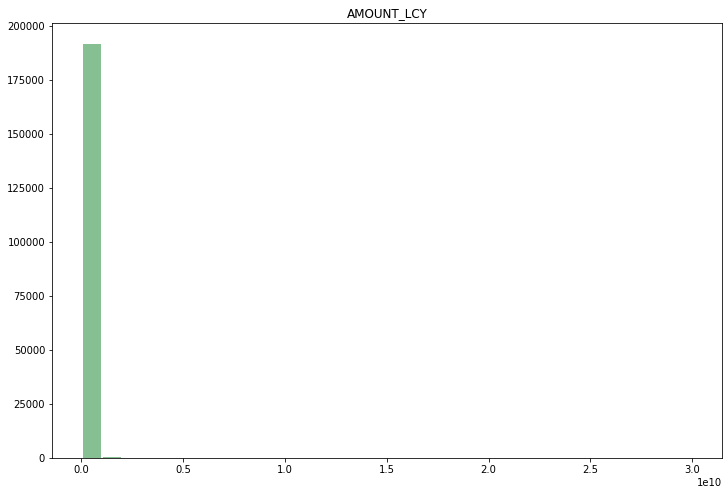

In [ ]:
df_new.hist(column='AMOUNT_LCY', bins=30, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

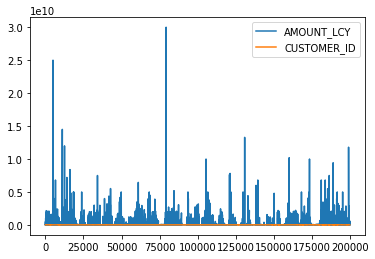

In [ ]:
RFM_Variables = df_new[['AMOUNT_LCY','CUSTOMER_ID']]
RFM_Variables.head(10)
RFM_Variables.plot()

data1: mean=8668655.954 stdv=3253280.617
data2: mean=7964847.649 stdv=168140979.994


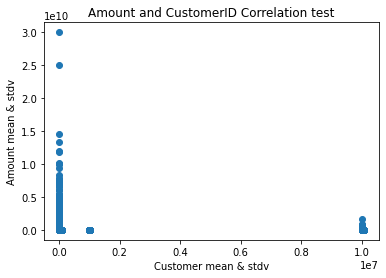

In [ ]:
# generate related variables
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
# seed random number generator
seed(1)
# prepare data
data1 = df_new['CUSTOMER_ID']
data2 = df_new['AMOUNT_LCY']
# summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))
# plot
pyplot.scatter(data1, data2)
plt.title("Amount and CustomerID Correlation test")
plt.xlabel("Customer mean & stdv")
plt.ylabel("Amount mean & stdv")
pyplot.show()

Spearman's Correlation test

In [ ]:
# calculate the spearmans's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import spearmanr
# seed random number generator
seed(1)
# prepare data
data1 = df_new['CUSTOMER_ID']
data2 = df_new['AMOUNT_LCY']
# calculate spearman's correlation
corr, _ = spearmanr(data1, data2)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: -0.065


**Using Box-Plot to Test for Outliers** 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


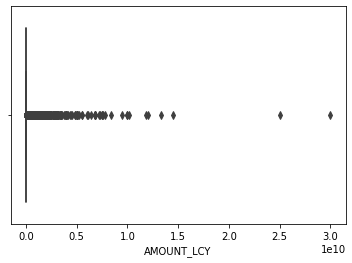

In [ ]:
# Box Plot
import seaborn as sns
sns.boxplot(df_new['AMOUNT_LCY'])


In [ ]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df_new['AMOUNT_LCY']))
print(z)

1         0.047370
2         0.047192
3         0.046817
4         0.047370
5         0.047182
            ...   
199995    0.047263
199996    0.047368
199997    0.047370
199998    0.047331
199999    0.047345
Name: AMOUNT_LCY, Length: 192084, dtype: float64


In [ ]:
threshold = 3
print(np.where(z > 3))

(array([   170,    181,    299,    345,    417,    592,    650,    755,
          882,   1104,   1116,   1175,   1234,   1293,   1399,   1588,
         1822,   1880,   2271,   2283,   2340,   2397,   2499,   2612,
         2670,   2853,   2897,   3178,   3794,   4018,   4359,   4416,
         4643,   4770,   4816,   4932,   5060,   5289,   5391,   5517,
         5574,   5676,   5859,   5975,   6265,   6322,   6652,   6835,
         6892,   7051,   7063,   7121,   7167,   7283,   7411,   7469,
         7585,   7688,   7861,   7919,   8035,   8262,   8320,   8491,
        10251,  10598,  10656,  11294,  11353,  11589,  11648,  11707,
        11754,  11766,  11825,  11943,  12002,  12061,  12179,  12403,
        12474,  12756,  12826,  13119,  13525,  13583,  13699,  13815,
        14400,  14575,  14748,  15256,  15326,  15384,  15501,  15662,
        15949,  15960,  16131,  16360,  16406,  16417,  16473,  16529,
        16586,  16698,  17260,  17318,  17551,  17669,  17681,  17858,
     

In [ ]:
df_new.head()

,RECID,ACCOUNT_NUMBER,AMOUNT_LCY,CUSTOMER_ID,ACCOUNT_OFFICER,VALUE_DATE,BOOKING_DATE,BOOKING_DATE_YMD,PROCESSING_DATE,DEB_CRE_IND,AMOUNT_LCY_SIGN,AMOUNT_FCY_SIGN,OPENINGDATE,DATE_LAST_CR_CUST,seqnum
1,1.9875E+14,0057267493,0.90,10000007.0,777,00:00.0,00:00.0,20220531,00:00.0,C,0.90,0.0,6/9/2016,6/15/2016,1
2,1.98706E+14,0076780146,30000.00,10009141.0,500696,00:00.0,00:00.0,20220526,00:00.0,C,30000.00,0.0,3/25/2020,8/10/2022,69
3,1.98156E+14,0087555265,93000.00,10000166.0,500930,00:00.0,00:00.0,20220401,00:00.0,C,93000.00,0.0,2/18/2022,7/14/2022,1
4,1.97564E+14,0057262780,0.11,10000023.0,1111,00:00.0,00:00.0,20220131,00:00.0,C,0.11,0.0,6/9/2016,6/21/2016,1
5,1.98132E+14,0057264368,31564.29,10000177.0,1111,00:00.0,00:00.0,20220330,00:00.0,C,31564.29,0.0,6/9/2016,8/1/2022,1


**Convert Booking date to Date Only**

In [ ]:
df_new['BOOKING_DATE'] = pd.to_datetime(df_new['BOOKING_DATE'])

**Convert Last Date Account was credited to Date Only**

In [ ]:
df_new['DATE_LAST_CR_CUST'] = pd.to_datetime(df_new['DATE_LAST_CR_CUST'])

In [ ]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 
#Amount for each customer
import datetime as dt

#Set Latest date 2022-08-12 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
#Latest_Date = dt.datetime(2022,8,11)

In [ ]:
df_recency = df_new.groupby(by='CUSTOMER_ID',
                        as_index=False)['DATE_LAST_CR_CUST'].max()

In [ ]:
import datetime as dt
Latest_Date = dt.datetime(2022,8,12)
df_recency.columns = ['CUSTOMER_ID', 'DATE_LAST_CR_CUST']

In [ ]:
df_recency['Recency'] = df_recency['DATE_LAST_CR_CUST'].apply(
    lambda x: (Latest_Date - x).days)

**Calculate Customer's recency**

In [ ]:
df_recency.head()

,CUSTOMER_ID,DATE_LAST_CR_CUST,Recency
0,10001.0,2022-08-10,2
1,10011.0,2022-08-10,2
2,100000.0,2013-05-07,3384
3,100002.0,2020-06-18,785
4,100004.0,2013-06-03,3357


**Calculate customers Frequency**

In [ ]:
frequency_df = df_new.drop_duplicates().groupby(
    by=['CUSTOMER_ID'], as_index=False)['RECID'].count()
frequency_df.columns = ['CUSTOMER_ID', 'Frequency']
frequency_df.head()

,CUSTOMER_ID,Frequency
0,10001.0,2067
1,10011.0,1369
2,100000.0,5
3,100002.0,5
4,100004.0,5


**Calculate Monetary value for Customers**

In [ ]:

#monetary_df = df_new.groupby(by='CUSTOMER_ID', as_index=False).['AMOUNT_LCY'].sum()
monetary_df = df_new.groupby(by='CUSTOMER_ID', as_index=False)['AMOUNT_LCY'].sum()
monetary_df.columns = ['CUSTOMER_ID', 'Monetary']

monetary_df.head()


,CUSTOMER_ID,Monetary
0,10001.0,1.181410e+12
1,10011.0,2.915409e+11
2,100000.0,3.529000e+01
3,100002.0,5.770000e+00
4,100004.0,7.540000e+00


In [ ]:
#df3=monetary_df['Monetary']

#rev_list=[round(x,-6) for x in df3]

In [ ]:
rf_df = df_recency.merge(frequency_df, on='CUSTOMER_ID')
rfm_df = rf_df.merge(monetary_df, on='CUSTOMER_ID').drop(
	columns='DATE_LAST_CR_CUST')
rfm_df.head()


,CUSTOMER_ID,Recency,Frequency,Monetary
0,10001.0,2,2067,1.181410e+12
1,10011.0,2,1369,2.915409e+11
2,100000.0,3384,5,3.529000e+01
3,100002.0,785,5,5.770000e+00
4,100004.0,3357,5,7.540000e+00


In [ ]:
rfm_df.shape

(16055, 4)

In [ ]:
#Descriptive Statistics (Recency)
rfm_df.Recency.describe()

count    16055.000000
mean      1444.660916
std        952.438134
min          1.000000
25%        632.000000
50%       1878.000000
75%       2247.000000
max       4986.000000
Name: Recency, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


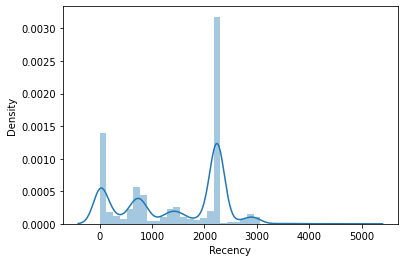

In [ ]:
#Recency distribution plot
import seaborn as sns
x = rfm_df['Recency']

ax = sns.distplot(x)

In [ ]:
#Descriptive Statistics (Frequency)
rfm_df.Frequency.describe()

count    16055.000000
mean        11.964123
std         43.909879
min          1.000000
25%          5.000000
50%          5.000000
75%          5.000000
max       2565.000000
Name: Frequency, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


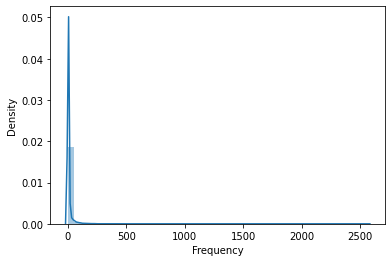

In [ ]:
#Frequency distribution plot
import seaborn as sns
x = rfm_df['Frequency']

ax = sns.distplot(x)

In [ ]:
#Descriptive Statistics (Monetary)
rfm_df.Monetary.describe()

count    1.605500e+04
mean     9.529242e+07
std      9.611309e+09
min      1.000000e-02
25%      5.200000e-01
50%      4.740000e+00
75%      1.115000e+01
max      1.181410e+12
Name: Monetary, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


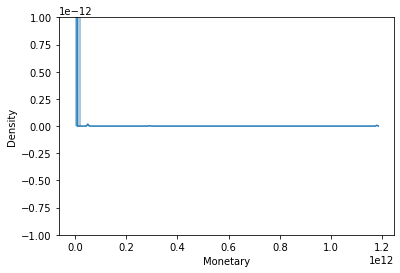

In [ ]:
#Monetary distribution plot
import seaborn as sns
x = rfm_df['Monetary']

ax = sns.distplot(x)

Ranking Customer’s based upon their recency, frequency, and monetary score
Here we are normalizing the rank of the customers within a company to analyze the ranking.

In [ ]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)

# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100

rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

rfm_df.head()


,CUSTOMER_ID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,10001.0,2,2067,1.181410e+12,98.092796,99.993771,99.993771
1,10011.0,2,1369,2.915409e+11,98.092796,99.981314,99.981314
2,100000.0,3384,5,3.529000e+01,0.318909,42.292121,42.292121
3,100002.0,785,5,5.770000e+00,67.271136,42.292121,42.292121
4,100004.0,3357,5,7.540000e+00,0.325163,42.292121,42.292121


Calculating RFM score
RFM score is calculated based upon recency, frequency, monetary value normalize ranks. Based upon this score we divide our customers. Here we rate them on a scale of 5. Formula used for calculating rfm score is : 0.15*Recency score + 0.28*Frequency score + 0.57 *Monetary score

In [ ]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
	rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['CUSTOMER_ID', 'RFM_Score']].head(7)


,CUSTOMER_ID,RFM_Score
0,10001.0,4.99
1,10011.0,4.98
2,100000.0,1.80
3,100002.0,2.30
4,100004.0,1.80
5,100006.0,1.80
6,100007.0,1.80


Rating Customer based upon the RFM score
rfm score >4.5 : Top Customer
4.5 > rfm score > 4 : High Value Customer
4>rfm score >3 : Medium value customer
3>rfm score>1.6 : Low-value customer
rfm score < 1.6 : very low- Inactive Customer

In [ ]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >
									4.5, "Top Depositing Customers",
									(np.where(
										rfm_df['RFM_Score'] > 4,
										"High Depositing Customer",
										(np.where(
	rfm_df['RFM_Score'] > 3,
							"Medium Depositing Customer",
							np.where(rfm_df['RFM_Score'] > 1.6,
							'Low Depositing Customers', 'Not Depositing Customers'))))))
rfm_df[['CUSTOMER_ID', 'RFM_Score', 'Customer_segment']].head(20)


,CUSTOMER_ID,RFM_Score,Customer_segment
0,10001.0,4.99,Top Depositing Customers
1,10011.0,4.98,Top Depositing Customers
2,100000.0,1.80,Low Depositing Customers
3,100002.0,2.30,Low Depositing Customers
4,100004.0,1.80,Low Depositing Customers
5,100006.0,1.80,Low Depositing Customers
6,100007.0,1.80,Low Depositing Customers
7,100008.0,0.75,Not Depositing Customers
8,100009.0,2.31,Low Depositing Customers
9,100010.0,2.32,Low Depositing Customers


** Visualizing the customer segments
Here we will use a pie plot to display all segments of customers. **

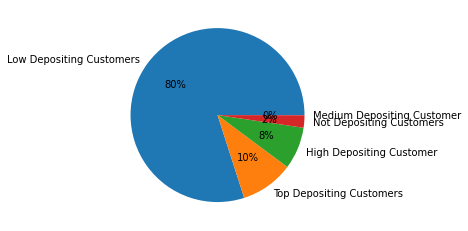

In [ ]:
plt.pie(rfm_df.Customer_segment.value_counts(),
		labels=rfm_df.Customer_segment.value_counts().index,
		autopct='%.0f%%')

plt.show()


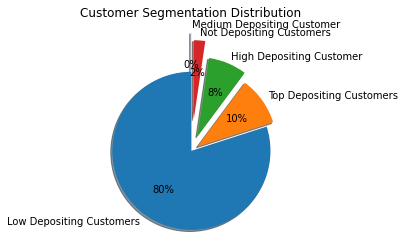

In [ ]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = rfm_df.Customer_segment.value_counts().index
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0.2, 0.4,0.5)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(rfm_df.Customer_segment.value_counts(), explode=explode, labels=labels, autopct='%.0f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Customer Segmentation Distribution ")

plt.show()

In [ ]:
rfm_df.head(20)

,CUSTOMER_ID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment
0,10001.0,2,2067,1.181410e+12,98.09,99.99,99.99,4.99,Top Depositing Customers
1,10011.0,2,1369,2.915409e+11,98.09,99.98,99.98,4.98,Top Depositing Customers
2,100000.0,3384,5,3.529000e+01,0.32,42.29,42.29,1.80,Low Depositing Customers
3,100002.0,785,5,5.770000e+00,67.27,42.29,42.29,2.30,Low Depositing Customers
4,100004.0,3357,5,7.540000e+00,0.33,42.29,42.29,1.80,Low Depositing Customers
5,100006.0,3466,5,8.380000e+00,0.28,42.29,42.29,1.80,Low Depositing Customers
6,100007.0,3466,5,6.170000e+00,0.28,42.29,42.29,1.80,Low Depositing Customers
7,100008.0,9,4,3.656795e+05,90.50,1.71,1.71,0.75,Not Depositing Customers
8,100009.0,731,5,1.715600e+02,68.73,42.29,42.29,2.31,Low Depositing Customers
9,100010.0,728,5,5.680000e+00,69.23,42.29,42.29,2.32,Low Depositing Customers


**K-Means Clustering**

In [ ]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

RFM Analysis Before LogTransformation

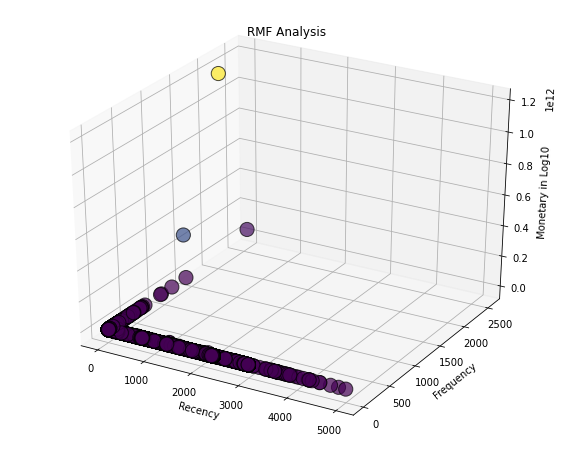

In [ ]:
#rfm_df[['Recency']], 'Frequency', 'Monetary']]

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
x = rfm_df[['Recency']]
y = rfm_df[['Frequency']]
z = rfm_df[['Monetary']]


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=z)
ax.set_title("RMF Analysis")
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary in Log10")
plt.show()


RFM after LogTransformation

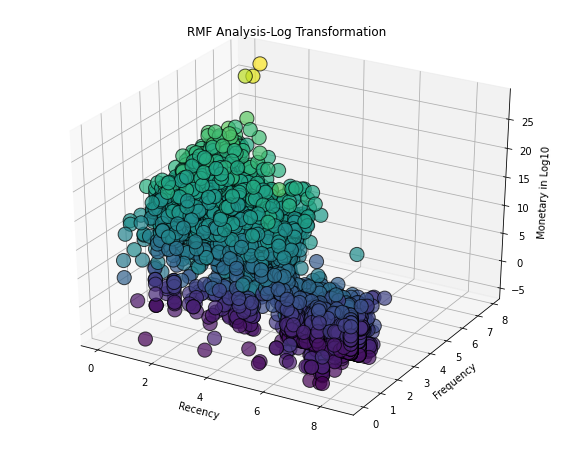

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

x = Log_Tfd_Data[['Recency']]
y = Log_Tfd_Data[['Frequency']]
z = Log_Tfd_Data[['Monetary']]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=z)
ax.set_title("RMF Analysis-Log Transformation")
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary in Log10")
plt.show()

In [ ]:
Log_Tfd_Data.head()

,Recency,Frequency,Monetary
0,0.693,7.634,27.798
1,0.693,7.222,26.398
2,8.127,1.609,3.564
3,6.666,1.609,1.753
4,8.119,1.609,2.020


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


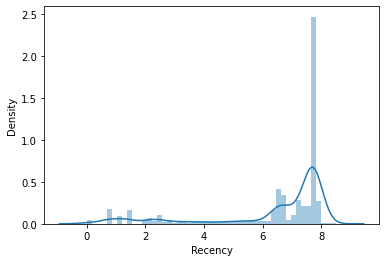

In [ ]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
ax = sns.distplot(Recency_Plot)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


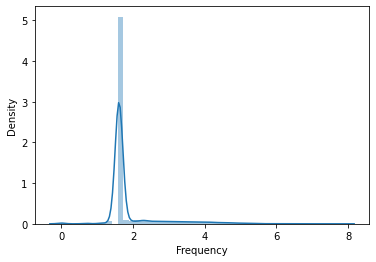

In [ ]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
ax = sns.distplot(Frequency_Plot)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


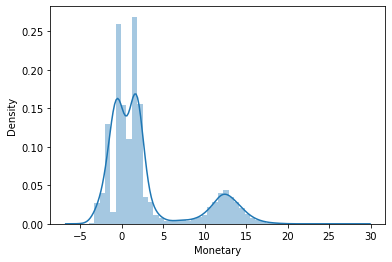

In [ ]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
ax = sns.distplot(Monetary_Plot)

In [ ]:
from sklearn.preprocessing import StandardScaler

#Bring the data on same scale
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_Tfd_Data)

#Transform it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = rfm_df.index, columns = Log_Tfd_Data.columns)

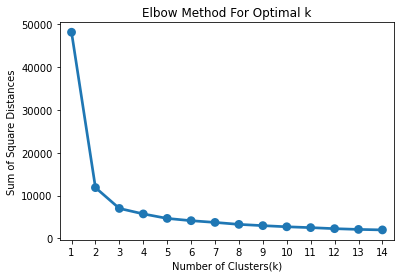

In [ ]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(Scaled_Data)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

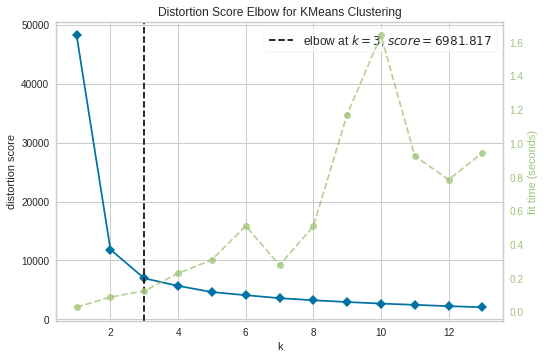

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,14)).fit(Scaled_Data)
visualizer.show()

**Fit Model into Dataset**

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(Scaled_Data)

In [ ]:
kmeans.labels_ 

array([0, 0, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
df_segm_kmeans= Scaled_Data.copy()
Scaled_Data['Segment K-means'] = kmeans.labels_

In [ ]:
df_segm_kmeans

,Recency,Frequency,Monetary,Segment K-means
0,-2.631786,7.753146,5.060206,0
1,-2.631786,7.199387,4.777193,0
2,0.808724,-0.344909,0.161236,1
3,0.132562,-0.344909,-0.204863,1
4,0.805021,-0.344909,-0.150888,1
...,...,...,...,...
16050,0.616659,-0.344909,-0.090040,1
16051,0.520395,-0.344909,-0.237207,1
16052,0.616659,-0.344909,-0.553172,1
16053,0.616659,-0.344909,-0.230334,1


In [ ]:
df_segm_analysis = Scaled_Data.groupby(['Segment K-means']).mean()
df_segm_analysis

,Recency,Frequency,Monetary
Segment K-means,,,
0,-2.305652,2.972606,2.251349
1,0.444005,-0.351119,-0.447008
2,-1.604536,0.427362,1.666569


In [ ]:
df_segm_analysis.rename({0:'Top depositing customers',
                         1:'Low depositing Customers',
                         2:'High depositing Customers'}, inplace = True)
                       

In [ ]:
df_segm_analysis

,Recency,Frequency,Monetary
Segment K-means,,,
Top depositing customers,-2.305652,2.972606,2.251349
Low depositing Customers,0.444005,-0.351119,-0.447008
High depositing Customers,-1.604536,0.427362,1.666569


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


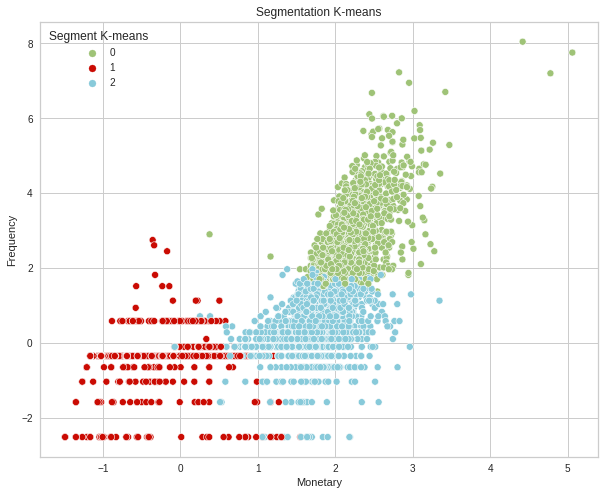

In [ ]:


x_axis = Scaled_Data['Monetary']
y_axis = Scaled_Data['Frequency']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue= Scaled_Data['Segment K-means'],palette= ['g', 'r', 'c'])
plt.title('Segmentation K-means')
plt.show()

In [ ]:
kmeans.cluster_centers_

array([[-2.30645816,  2.97449237,  2.25189631],
       [ 0.44400485, -0.35111944, -0.44700819],
       [-1.60474516,  0.42888206,  1.66683475]])

In [ ]:
from collections import Counter
Counter(kmeans.labels_)

Counter({0: 1285, 1: 13015, 2: 1755})

In [ ]:
rfm_df

,CUSTOMER_ID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment
0,10001.0,2,2067,1.181410e+12,98.09,99.99,99.99,4.99,Top Depositing Customers
1,10011.0,2,1369,2.915409e+11,98.09,99.98,99.98,4.98,Top Depositing Customers
2,100000.0,3384,5,3.529000e+01,0.32,42.29,42.29,1.80,Low Depositing Customers
3,100002.0,785,5,5.770000e+00,67.27,42.29,42.29,2.30,Low Depositing Customers
4,100004.0,3357,5,7.540000e+00,0.33,42.29,42.29,1.80,Low Depositing Customers
...,...,...,...,...,...,...,...,...,...
16050,10063257.0,2234,5,1.019000e+01,42.44,42.29,42.29,2.12,Low Depositing Customers
16051,10063472.0,1815,5,4.920000e+00,50.59,42.29,42.29,2.18,Low Depositing Customers
16052,10063518.0,2236,5,1.030000e+00,39.88,42.29,42.29,2.10,Low Depositing Customers
16053,10063900.0,2235,5,5.090000e+00,41.31,42.29,42.29,2.11,Low Depositing Customers


In [ ]:
kmeans

KMeans(n_clusters=3, random_state=0)

Test Results for clusters

In [ ]:
Log_Tfd_Data.describe()
Log_Tfd_Data.var()

Recency       4.669029
Frequency     0.553579
Monetary     24.471897
dtype: float64

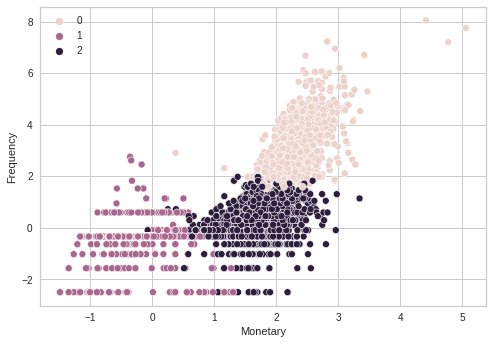

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=Scaled_Data, x="Monetary", y="Frequency", hue=kmeans.labels_)
plt.show()

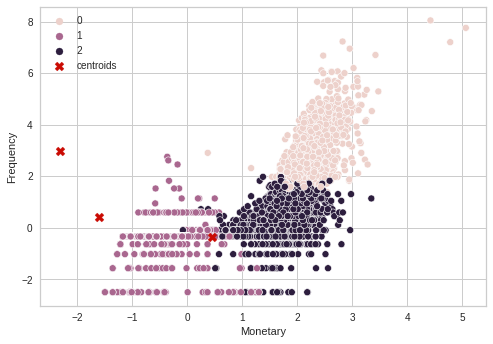

In [ ]:
sns.scatterplot(data=Scaled_Data, x="Monetary", y="Frequency", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

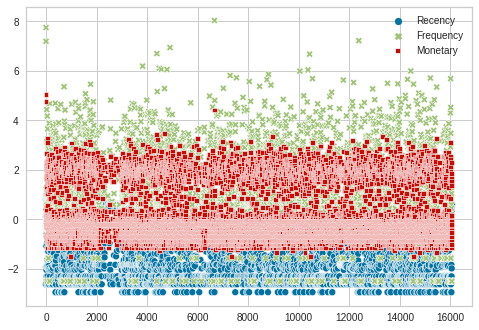

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=Scaled_Data)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.random.rand(20)
y = np.random.rand(20)
z = x*y

fig = plt.figure(figsize=(6, 6))
plt.scatter(x, y,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=z)
plt.show()

In [ ]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(Scaled_Data)

#Find the clusters for the observation given in the dataset
rfm_df['Cluster'] = KMean_clust.labels_
rfm_df.describe()

,CUSTOMER_ID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Cluster
count,1.605500e+04,16055.000000,16055.000000,1.605500e+04,16055.000000,16055.000000,16055.000000,16055.000000,16055.000000
mean,8.932984e+06,1444.660916,11.964123,9.529242e+07,50.199750,50.001517,50.001517,2.501832,0.269386
std,2.942890e+06,952.438134,43.909879,9.611309e+09,28.973719,20.184480,20.184480,0.994568,0.597423
min,1.000100e+04,1.000000,1.000000,1.000000e-02,0.010000,0.250000,0.250000,0.070000,0.000000
25%,1.000361e+07,632.000000,5.000000,5.200000e-01,26.080000,42.290000,42.290000,1.960000,0.000000
50%,1.001158e+07,1878.000000,5.000000,4.740000e+00,50.200000,42.290000,42.290000,2.160000,0.000000
75%,1.002024e+07,2247.000000,5.000000,1.115000e+01,75.470000,42.290000,42.290000,2.350000,0.000000
max,1.006409e+07,4986.000000,2565.000000,1.181410e+12,100.000000,100.000000,100.000000,5.000000,2.000000


In [ ]:
rfm_df['Cluster']


0        2
1        2
2        1
3        1
4        1
        ..
16050    1
16051    1
16052    1
16053    1
16054    1
Name: Cluster, Length: 16055, dtype: int32

In [ ]:
from collections import Counter
Counter(kmeans.labels_)

Counter({1: 2764, 0: 13291})

<Figure size 504x504 with 0 Axes>

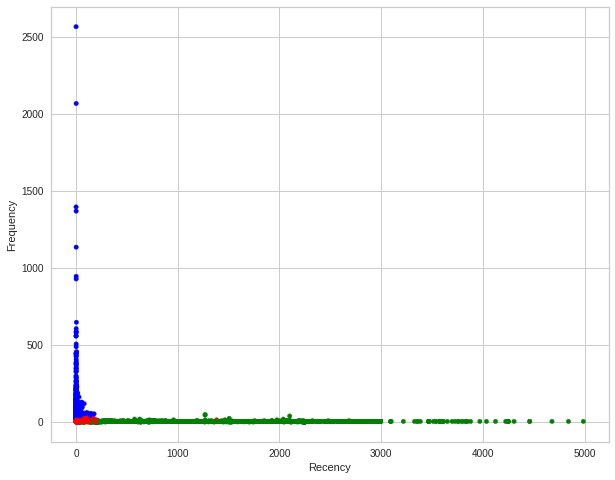

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue"]
rfm_df['Color'] = rfm_df['Cluster'].map(lambda p: Colors[p])
ax = rfm_df.plot(    
    kind="scatter", 
    x="Recency", y="Frequency", 
    figsize=(10,8),
    c = rfm_df['Color']
)

In [ ]:
rfm_df.head()

,CUSTOMER_ID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment,Cluster,Color
0,10001.0,2,2067,1.181410e+12,98.09,99.99,99.99,4.99,Top Depositing Customers,2,blue
1,10011.0,2,1369,2.915409e+11,98.09,99.98,99.98,4.98,Top Depositing Customers,2,blue
2,100000.0,3384,5,3.529000e+01,0.32,42.29,42.29,1.80,Low Depositing Customers,1,green
3,100002.0,785,5,5.770000e+00,67.27,42.29,42.29,2.30,Low Depositing Customers,1,green
4,100004.0,3357,5,7.540000e+00,0.33,42.29,42.29,1.80,Low Depositing Customers,1,green


In [ ]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 10)
 
#predict the labels of clusters.
label = kmeans.fit_predict(Scaled_Data)
 
print(label)

[4 4 8 ... 5 8 5]


In [ ]:
Scaled_Data

,Recency,Frequency,Monetary
0,-2.631786,7.753146,5.060206
1,-2.631786,7.199387,4.777193
2,0.808724,-0.344909,0.161236
3,0.132562,-0.344909,-0.204863
4,0.805021,-0.344909,-0.150888
...,...,...,...
16050,0.616659,-0.344909,-0.090040
16051,0.520395,-0.344909,-0.237207
16052,0.616659,-0.344909,-0.553172
16053,0.616659,-0.344909,-0.230334


**K-Means Version 2**

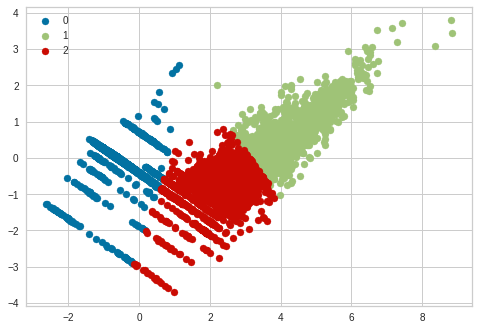

In [ ]:
#Importing required modules
 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
#Load Data
data = Scaled_Data
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data)

 
#Import KMeans module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()